In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [88]:
mu_s_max = 0.60
mu_k = 0.40

theta_max = 180.0/np.pi*np.arctan(mu_s_max) # maximum angle of incline in degrees (when slipping starts)
print ("Theta_max = ",theta_max)

t_max = 10.0 # maximum time of simulation.

m = 0.500 # mass of object in kg
g = 9.80 # acceleration of gravity in m/s^2

xs = 1.00
ys = 0.50
xl = 0.20
yl = 0.10

r = xs/2.0
x0 = xs/2.0
y0 = yl/2.0

Theta_max =  30.96375653207352


In [89]:
def get_acceleration(theta,mu):
    a = -g*np.sin(theta*np.pi/180.0)+mu*g*np.cos(theta*np.pi/180.0)
    return a

def get_friction(theta,mu):
    N = m*g*np.cos(theta*np.pi/180.0)
    f = mu*N
    return f

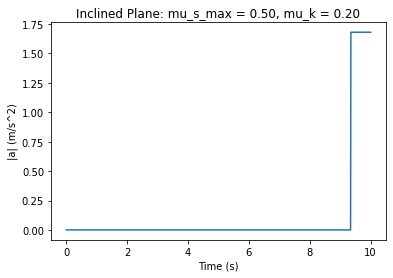

In [90]:
nsteps = 1001
debug = False

xpos = np.zeros(nsteps)
ypos = np.zeros(nsteps)

a = np.zeros(nsteps)
v = np.zeros(nsteps)
mu = np.zeros(nsteps)
theta_step = np.zeros(nsteps)
f = np.zeros(nsteps)
t = np.zeros(nsteps)

theta_old = 0.0
xpos_old = x0
ypos_old = y0
xpos[0] = x0
ypos[0] = y0

v[0] = 0.0
a[0] = 0.0
v_old = 0.0

for i in range(1,nsteps):
    dt = t_max/(nsteps-1)
    t[i] = i*dt
    theta_step[i] = t[i]/t_max*1.07*theta_max
    if (theta_step[i]) > theta_max: theta_step[i] = theta_max
        
    a_compare = get_acceleration(theta_step[i],mu_s_max)
    dtheta = theta_step[i]-theta_old
    
    if debug: print (i, theta_old, theta_step[i], a_compare, dtheta)
    
    theta_old = theta_step[i]
    
    if a_compare > 0:
        a[i] = 0.0
        mu_theta = np.tan(theta_step[i]*np.pi/180.0)
        f[i] = get_friction(theta_step[i],mu_theta)
        xpos[i] = xpos_old - r*dtheta*np.pi/180.0*np.sin(np.pi/180.0*theta_step[i])
        ypos[i] = ypos_old + r*dtheta*np.pi/180.0*np.cos(np.pi/180.0*theta_step[i])
        if debug: print ("static: ",i,xpos[i],xpos_old,ypos[i],ypos_old)
        xpos_old = xpos[i]
        ypos_old = ypos[i]
    else:
        a[i] = get_acceleration(theta_step[i],mu_k)
        f[i] = get_friction(theta_step[i],mu_k)
        v[i] = v_old + a[i]*dt
        dx = v_old*dt + 0.5*a[i]*dt**2
        v_old = v[i]
        
        xpos[i] = xpos_old + dx*np.cos(np.pi/180.0*theta_step[i])
        ypos[i] = ypos_old + dx*np.sin(np.pi/180.0*theta_step[i])
        if debug: print ("kinetic: ",i,xpos[i],xpos_old,ypos[i],ypos_old)
        xpos_old = xpos[i]
        ypos_old = ypos[i]
        
plt.plot(t,abs(a))
plt.xlabel('Time (s)')
plt.ylabel('|a| (m/s^2)')
plt.title('Inclined Plane: mu_s_max = 0.50, mu_k = 0.20')
plt.show()

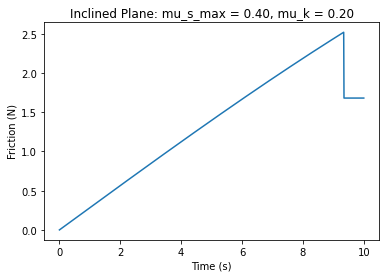

In [91]:
plt.plot(t,f)
plt.xlabel('Time (s)')
plt.ylabel('Friction (N)')
plt.title('Inclined Plane: mu_s_max = 0.40, mu_k = 0.20')
plt.show()

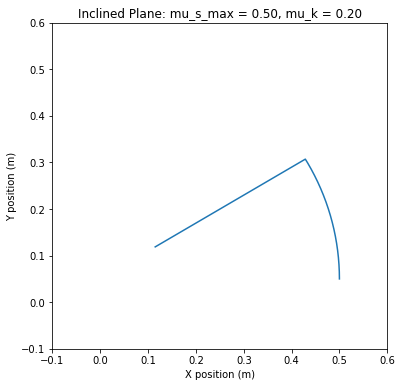

In [92]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plt.plot(xpos,ypos)
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
axs2.set_xlim(-0.1,0.6)
axs2.set_ylim(-0.1,0.6)
plt.title('Inclined Plane: mu_s_max = 0.50, mu_k = 0.20')
plt.show()